# <u> Notebook </u> [_Hypothesis-3_]

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [3]:
# reading the data
income_data = pd.read_csv("data/cleaned_income_data.csv")  

# check for the first few values in the data.
income_data.head()

,year,household_type,up_to_10%,10-20%,20-30%,30-40%,40-50%,over_50%,total,population_total,poverty_risk_population,non_poverty_risk_population
0,2020,Households without children,13.194,14.586,9.466,4.365,1.899,2.875,48.183,21.5,42.0,17.6
1,2020,Persons living alone,3.052,3.454,3.876,2.397,1.183,1.802,16.468,29.8,46.7,23.1
2,2020,Two adults without children,7.365,9.335,4.850,1.706,0.623,0.868,25.660,18.7,38.0,16.1
3,2020,Three or more adults without children,2.777,1.797,0.740,0.262,1.001,0.206,6.054,21.5,42.0,17.6
4,2020,Households with children,10.178,10.511,7.573,2.444,1.001,1.407,33.972,21.5,42.0,17.6


In [6]:
income_data.describe()

,year,up_to_10%,10-20%,20-30%,30-40%,40-50%,over_50%,total,population_total,poverty_risk_population,non_poverty_risk_population
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2022.000000,6.614244,8.259756,6.192889,3.057522,1.405511,1.787122,27.695067,24.991111,44.057778,21.446667
std,1.430194,5.824458,7.425154,5.523119,2.718806,1.206335,1.656400,24.461852,3.735263,3.199538,3.257760
min,2020.000000,0.925000,0.614000,0.539000,0.218000,0.085000,0.090000,3.673000,18.700000,38.000000,16.100000
25%,2021.000000,2.005000,1.819000,0.989000,0.645000,0.396000,0.392000,5.676000,22.500000,42.000000,19.700000
50%,2022.000000,5.412000,8.598000,5.721000,2.775000,1.115000,1.391000,25.467000,24.500000,43.700000,21.000000
75%,2023.000000,9.090000,10.831000,8.405000,3.923000,1.640000,2.344000,35.615000,25.200000,45.800000,21.800000
max,2024.000000,23.372000,25.371000,20.047000,10.151000,4.606000,6.138000,83.953000,33.800000,52.500000,32.200000


In [4]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         45 non-null     int64  
 1   household_type               45 non-null     object 
 2   up_to_10%                    45 non-null     float64
 3   10-20%                       45 non-null     float64
 4   20-30%                       45 non-null     float64
 5   30-40%                       45 non-null     float64
 6   40-50%                       45 non-null     float64
 7   over_50%                     45 non-null     float64
 8   total                        45 non-null     float64
 9   population_total             45 non-null     float64
 10  poverty_risk_population      45 non-null     float64
 11  non_poverty_risk_population  45 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.3+ KB


### <u>Hypothesis 3</u> :
**Couples with children are especially at risk of poverty, because of the extra costs like having to rent a bigger flat**.

- Track poverty risk for the households with children.
- See if people are moving into higher risk population over the years.
- Data to Use:
    - Poverty risk population
    - Trend lines over time
    - Relevant household  types 


In [5]:
income_data.household_type.unique()

array(['Households without children', 'Persons living alone',
       'Two adults without children',
       'Three or more adults without children',
       'Households with children', 'Lone parents',
       'Two adults with children', 'Three or more adults with children',
       'Total_2020', 'Total_2021', 'Total_2022', 'Total_2023',
       'Total_2024'], dtype=object)

In [6]:
relevant_types = ['Persons living alone', 'Two adults with children', 
                   'Lone parents', 'Three or more adults with children']    

subset_data = income_data[income_data['household_type'].isin(relevant_types)]
#subset_data.shape 

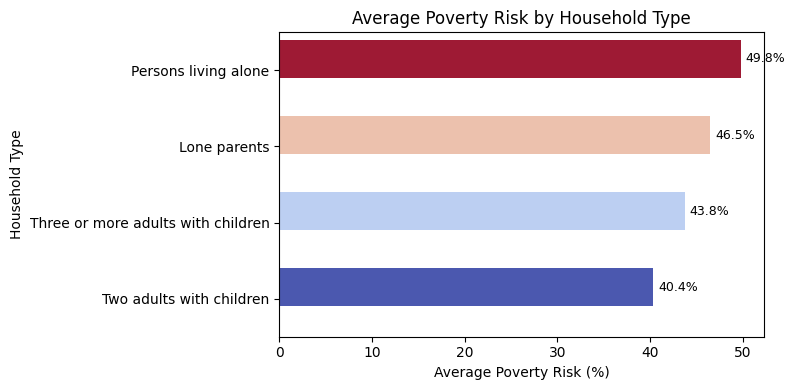

In [7]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# grouping to plot
grouped = subset_data.groupby('household_type')['poverty_risk_population'].mean().sort_values(
                                                                                        ascending=False)
# Reset Index to make a column again out of the index
grouped = grouped.reset_index()


# Normalize the data values to 0-1 range for colormap
norm = mcolors.Normalize(vmin=grouped['poverty_risk_population'].min(), 
                         vmax=grouped['poverty_risk_population'].max())
# Choose a colormap
cmap = cm.get_cmap('coolwarm')  # You can try 'coolwarm', 'plasma', 'magma', etc.
# Generate colors based on values
colors = [cmap(norm(value)) for value in grouped['poverty_risk_population']]



# Barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=grouped, 
                 x='poverty_risk_population', 
                 y='household_type', 
                 palette=colors)  # Try 'pastel', 'deep', etc.

# Adjusting bar thickness
for patch in ax.patches:
    patch.set_height(0.5)  # type: ignore # Adjust between 0.3 and 0.8 as needed

# Add labels
for patch in ax.patches:
    value = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    ax.text(value + 0.5, y, f"{value:.1f}%", va='center', fontsize=9)

plt.title('Average Poverty Risk by Household Type')
plt.xlabel('Average Poverty Risk (%)')
plt.ylabel('Household Type')
plt.tight_layout()
plt.show()

- Average Poverty Risk over time by Household type. <br> We use ```Line-Plot``` to showcase this for the years 2020, 2021, 2022, 2023 and 2024.

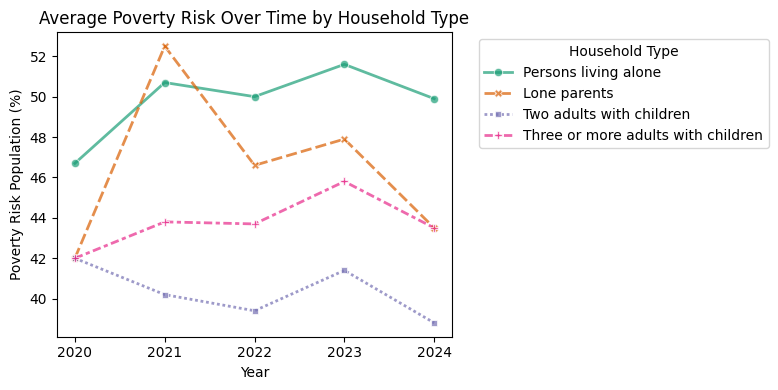

In [8]:
# Define specific styles per household
line_styles = {
    'Persons living alone': (0, ()),  # solid
    'Households with children': (0, (1, 1)),  # very short dashes (dotty)
    'Lone parents': (0, (3, 1, 1, 1)),  # dash-dot
    'Two adults with children': (0, (5, 2)),  # longer dashes
    'Three or more adults with children': (0, (1, 2))  # spaced dot-like dashes
}

# Plot with a nice palette
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=subset_data,
    x='year',
    y='poverty_risk_population',
    hue='household_type',
    style='household_type',  # different line styles
    markers=True,
    dashes=True,
    linewidth=2,
    palette='Dark2',
    alpha=0.7  
)


# Apply custom line styles
for line, label in zip(ax.lines, subset_data['household_type'].unique()):
    line.set_linestyle(line_styles.get(label, (0, ())))  # default solid if missing



plt.title("Average Poverty Risk Over Time by Household Type")
plt.ylabel("Poverty Risk Population (%)")
plt.xlabel("Year")
plt.xticks(ticks=range(2020, 2025), labels=[str(y) for y in range(2020, 2025)])
plt.legend(title="Household Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- The green line ```(Three or more adults with children)``` is visually overlapping the orange one ```(Households with children)``` almost perfectly.
- Their trends are similar — both are influenced by similar economic or social conditions.
- Their average risk values are nearly the same — they face similar levels of poverty risk year by year.

“Between 2020 and 2024, households with children and three or more adults with children experienced nearly identical poverty risk levels. This indicates these groups may share similar vulnerabilities or structural disadvantages — perhaps due to childcare costs or housing constraints — and could benefit from similarly targeted support policies.”

Lines overlapping completely, it may suggest that one group is a subset of the other, or that definitions may overlap in your data source (e.g., "households with children" may include “three or more adults with children”)
``````

In [9]:
subset_data[subset_data['household_type'].isin([
    'Households with children', 
    'Three or more adults with children'
])].pivot(index='year', columns='household_type', values='poverty_risk_population')

df = subset_data.pivot(index='year', columns='household_type', values='poverty_risk_population')
df.corr()


household_type,Lone parents,Persons living alone,Three or more adults with children,Two adults with children
household_type,,,,
Lone parents,1.000000,0.711240,0.531072,-0.104897
Persons living alone,0.711240,1.000000,0.910295,-0.374085
Three or more adults with children,0.531072,0.910295,1.000000,-0.042533
Two adults with children,-0.104897,-0.374085,-0.042533,1.000000


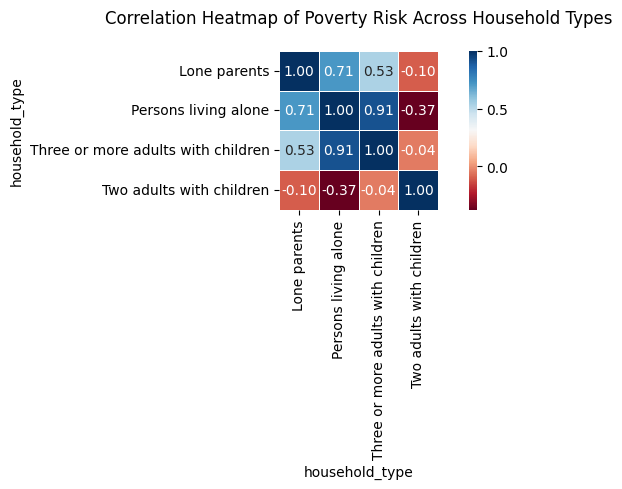

In [10]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Poverty Risk Across Household Types", pad=20)
plt.tight_layout() 
plt.show()

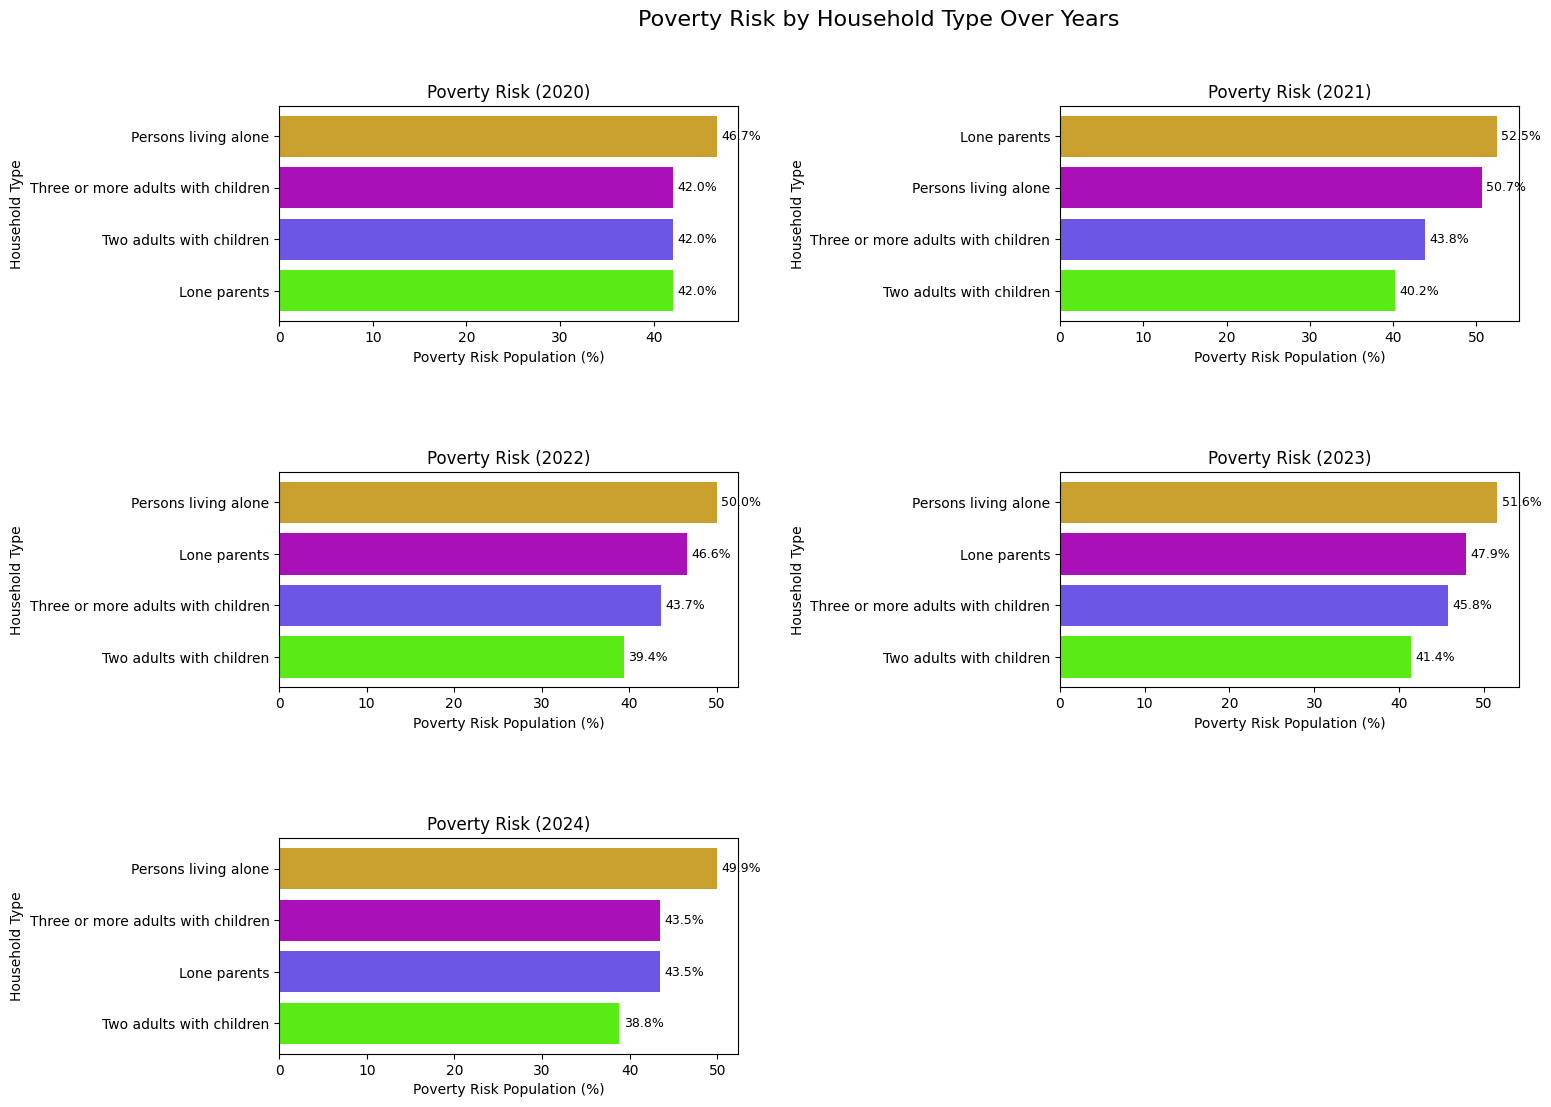

In [11]:
# Adjustment for the main plot
years = sorted(subset_data['year'].unique())
for yr in years:
    year_subset = subset_data[subset_data['year'] == yr]

n_cols = 2
n_rows = (len(years) + n_cols - 1) // n_cols  # calculate needed rows


custom_colors = ["#5AEB17", "#6C56E5", "#A910B7", "#C9A02E", "#C25858"]
# Repeat colors if there are more bars than colors:
colors = [custom_colors[i % len(custom_colors)] for i in range(len(year_subset))]
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4), constrained_layout=False)


# Flatten axes array for easy iteration (in case n_rows or n_cols = 1)
axes = axes.flatten()

for i, yr in enumerate(years):
    ax = axes[i]
    year_subset = subset_data[subset_data['year'] == yr]
    
    # Sort if you want bars ordered by value
    year_subset = year_subset.sort_values('poverty_risk_population')
    
    ax.barh(year_subset['household_type'], year_subset['poverty_risk_population'], 
            color=colors)
    
    ax.set_title(f"Poverty Risk ({yr})")
    ax.set_xlabel("Poverty Risk Population (%)")
    ax.set_ylabel("Household Type")
    

    # Optional: improve layout for long labels
    ax.tick_params(axis='y', labelrotation=0)
    # Add value labels
    for index, value in enumerate(year_subset['poverty_risk_population']):
        ax.text(value + 0.5,   # shift right of bar end
                index,         # y position (matches bar)
                f"{value:.1f}%",  # formatted label
                va='center',
                fontsize=9)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Poverty Risk by Household Type Over Years", fontsize=16)
plt.subplots_adjust(wspace=0.7, hspace=0.7, top=0.9)

plt.show()



#### <u>Explanation</u> :
From all the above plots we clearly see that for the most years (except the year 2024), People who are living alone and Lone/Single parents are at higher risk of poverty making the population at risk values nearly 50%. <br> This number is very high for any group in itself making every second person at risk of poverty in the coming years. 


#### <u>Conclusion</u> :
Our hypothesis _**Couples with children are especially at risk of poverty, because of the extra costs like having to rent a bigger flat**_ is not supported with the outcomes we saw. 
- This gives a clear contrast about the general societal notion. 